<h1><center>PCA and Clusterization with the Iris Dataset</center></h1>

<center>Lois Fernández Míguez</center>

# Introduction

In this Notebook a Principal Component Analysis (PCA) will be carried out on the well-known Iris flower data set, whose three varieties (setosa, virginica and versicolor); after being subjected to PCA, they will be classified using Machine Learning (ML) techniques

We'll start by importing the necessary libraries

In [1]:
import numpy             as np
import matplotlib.pyplot as plt
import pandas            as pd
import seaborn           as sn

from sklearn.decomposition import PCA, KernelPCA
from sklearn.cluster       import KMeans

plt.style.use('fivethirtyeight')

Now we import the dataset, which must be located in the same folder as the notebook

In [2]:
df = pd.read_csv('iris.csv', sep=',')
attributes = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
df.columns = attributes
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width   class
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


We divide the available information into X (features) and Y (target)

In [3]:
X = df.drop(columns='class')
Y = df['class']

names = np.array(df.columns) #To extract the column names

print('x data:')
print(X.head())
print('\ny data:')
print(Y.head())

x data:
   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2

y data:
0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: class, dtype: object


# PCA data and classification with KMeans

Let's now represent the different attributes we have and the class they belong to. To do this, first we're going to separate the data to make it easier to represent

In [4]:
setosa     = X[Y=='setosa'].to_numpy()
virginica  = X[Y=='virginica'].to_numpy()
versicolor = X[Y=='versicolor'].to_numpy()

We now represent the density distribution of the different features for all the Iris flower types

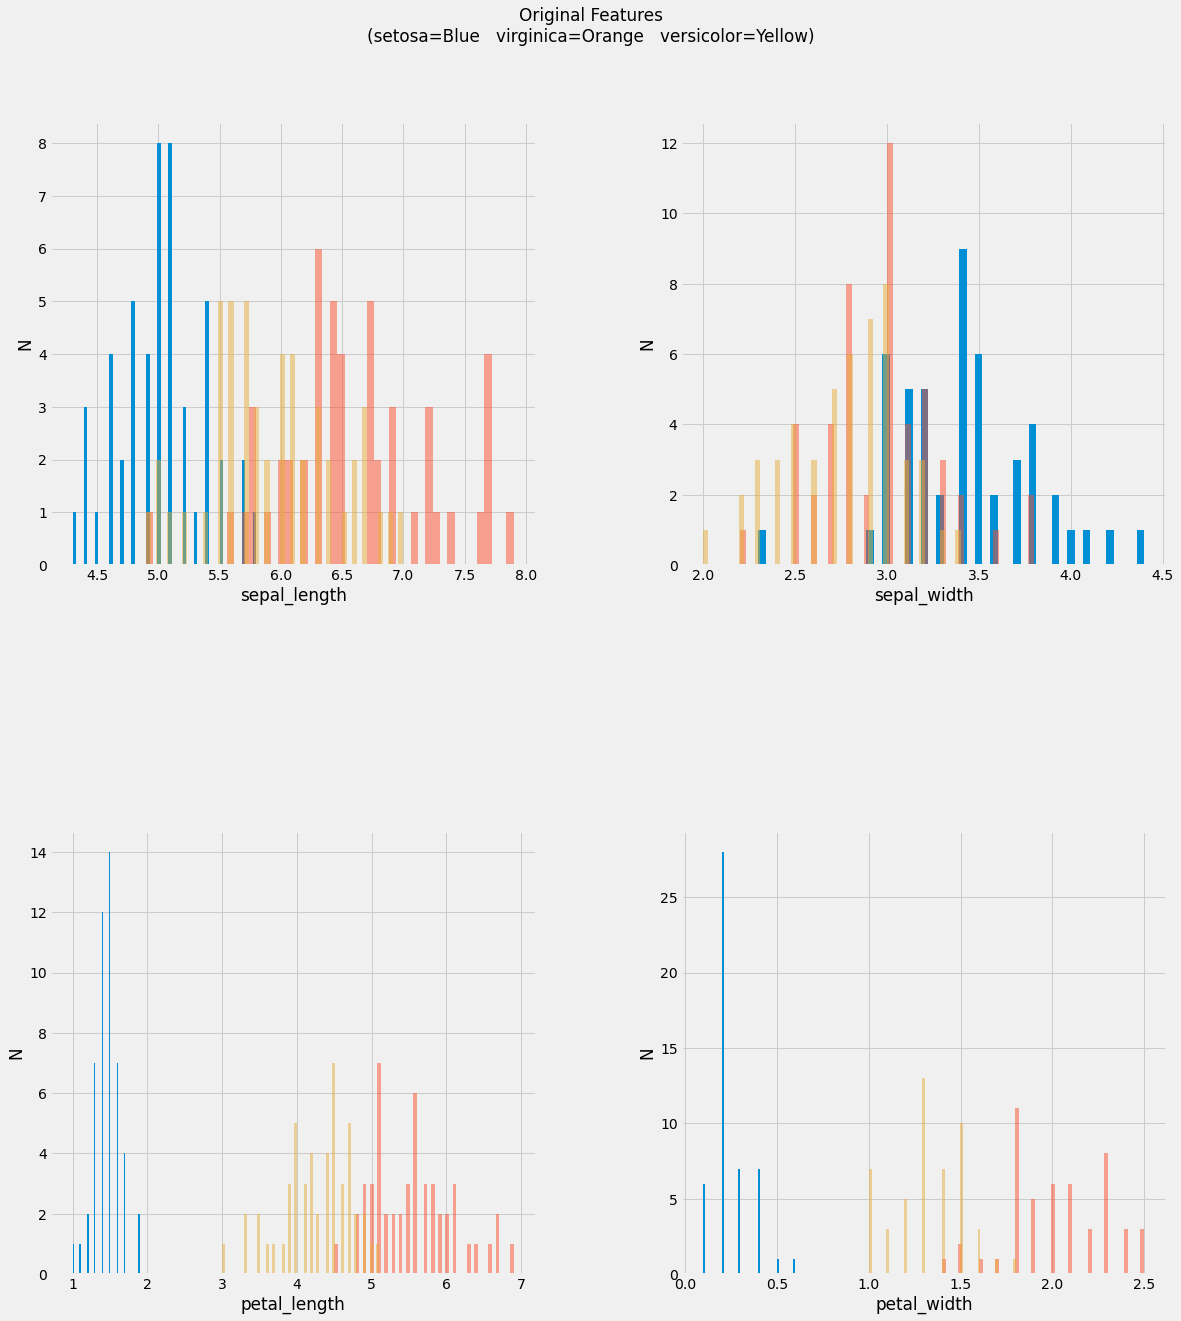

In [5]:
fig1 = plt.figure(figsize=(20,20))
fig1.suptitle('Original Features\n(setosa=Blue   virginica=Orange   versicolor=Yellow)')
Nbins = 50
d = {}
for i in range(len(names)-1):
    d["ax{0}".format(i)]=fig1.add_subplot(2,2,i+1)
    
    d['ax%i'%i].hist(setosa[:,i], Nbins,label='setosa',histtype='stepfilled')
    d['ax%i'%i].hist(virginica[:,i], Nbins,alpha=0.5,label='virginica',histtype='stepfilled')
    d['ax%i'%i].hist(versicolor[:,i], Nbins,alpha=0.5,label='versicolor',histtype='stepfilled')  
    
    d['ax%i'%i].set_xlabel(names[i])
    d['ax%i'%i].set_ylabel('N')

fig1.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.6)

Looking at the graph we see that a classifier that separates the setosa from the other two varieties is simple to do since their probability distributions do not overlap at any time.

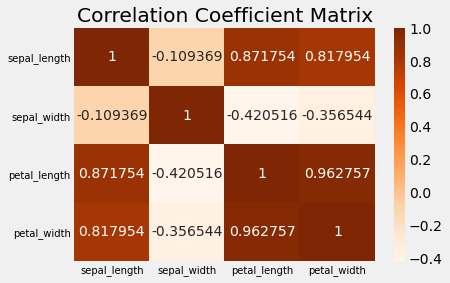

In [6]:
covMatrix = np.corrcoef(X.T.to_numpy())

sn.heatmap(covMatrix, annot=True, fmt='g',cmap='Oranges')
plt.title('Correlation Coefficient Matrix')
plt.xticks(ticks=np.linspace(0.5,3.5,4),labels=names[:-1],fontsize=10)
plt.yticks(ticks=np.linspace(0.5,3.5,4),labels=names[:-1],fontsize=10,rotation=0)
plt.show()

Let's proceed now with the PCA. First we are going to estimate the number of dimensions we are going to do PCA as a function of the variance. We'll start with two dimensions. We know that there should be 3 clusters, one for each type of flower, so we will not study what is the optimal number of clusters

In [7]:
pca = PCA(n_components=2) #PCA into a 2 dimension space

pca_data = pca.fit_transform(X)
varianz  = pca.explained_variance_ratio_

pca_km=KMeans( # Clusterization of the data
        n_clusters=3, init='random',
          n_init=10, max_iter=300,
          tol=1e-04, random_state=0, algorithm='full' # Options: auto, full, elkan
          )
pca_km_data=pca_km.fit(pca_data)
ev=pca.components_ # Extract the Eigenvectors
ev=ev.T
print('Relative Variance for Dimension:')
print(varianz)
print('Total Variance Saved:')
print(sum(varianz))

Relative Variance for Dimension:
[0.92461621 0.05301557]
Total Variance Saved:
0.9776317750248031


Since we lose only 2% of the variance we can assume that this is a good approximation. If we were to go up to 3 dimensions we would lose only 0.5% of the variance but we consider that it is not worth losing the clarity of a two-dimensional diagram when 2% is a good result

In [8]:
#Dividimos entre los distintos tipos por el tipo que nos dice que es el grafico
pca_1=pca_data[df['class']=='setosa']
pca_2=pca_data[df['class']=='virginica']
pca_3=pca_data[df['class']=='versicolor']

pca_c=pca_km.cluster_centers_

pca_c1=pca_data[pca_km_data.labels_==0]
pca_c2=pca_data[pca_km_data.labels_==1]
pca_c3=pca_data[pca_km_data.labels_==2]

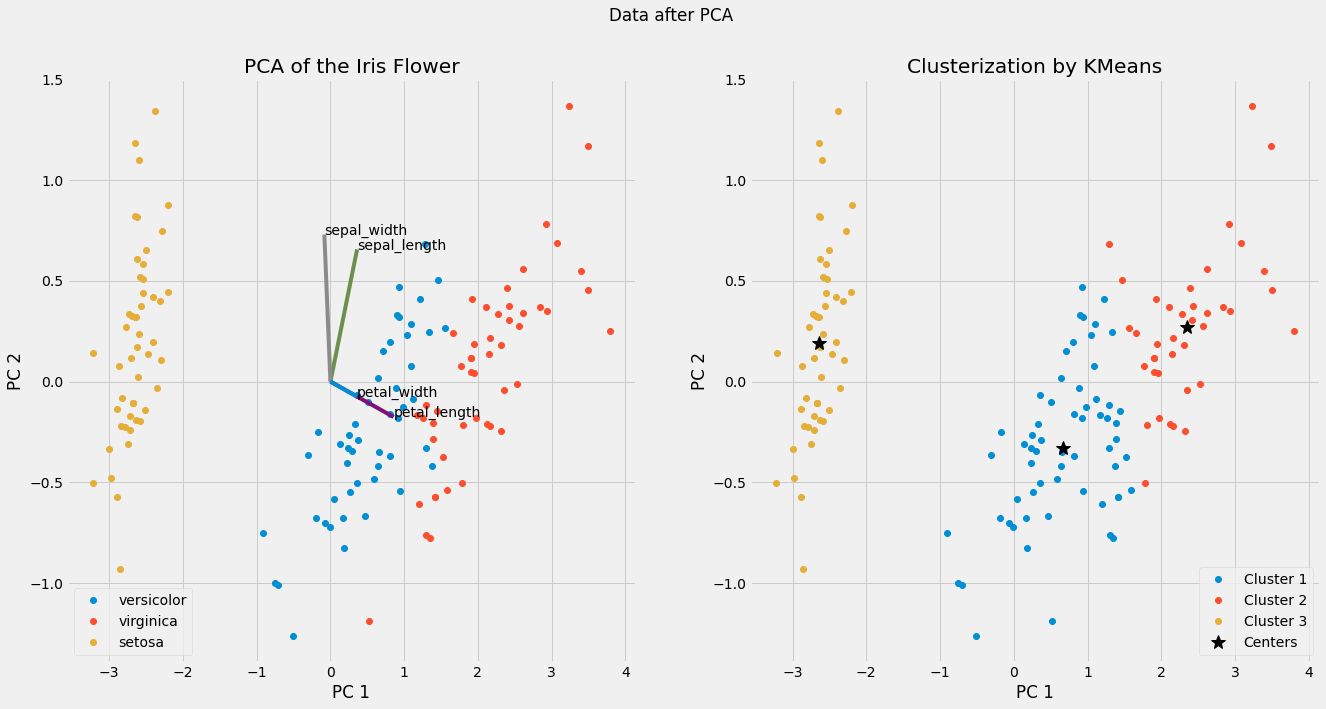

In [9]:
fig3=plt.figure(figsize=(20,10))
fig3.suptitle('Data after PCA')

# Fig A
axb = fig3.add_subplot(121)
axb.plot(pca_3[:,0], pca_3[:,1], 'o', label='versicolor')
axb.plot(pca_2[:,0], pca_2[:,1], 'o', label='virginica')
axb.plot(pca_1[:,0], pca_1[:,1], 'o', label='setosa')

for i in range(4):
    axb.plot([0,ev[i][0]],[0,ev[i][1]],ls='-')
    axb.text(ev[i][0],ev[i][1],names[i])

axb.set_title('PCA of the Iris Flower')
axb.set_xlabel('PC 1')
axb.set_ylabel('PC 2')
axb.legend()

# Fig B
axc=fig3.add_subplot(122)
axc.plot(pca_c1[:,0], pca_c1[:,1], 'o', label='Cluster 1')
axc.plot(pca_c2[:,0], pca_c2[:,1], 'o', label='Cluster 2')
axc.plot(pca_c3[:,0], pca_c3[:,1], 'o', label='Cluster 3')
axc.plot(pca_c[:,0], pca_c[:,1], ls='', marker='*', color='black', markersize=15, label='Centers')
axc.set_title('Clusterization by KMeans')
axc.set_xlabel('PC 1')
axc.set_ylabel('PC 2')
axc.legend()

plt.show()

It is observed that the division by clusters through SVC (linear division), by its own nature, is not able to discern the complicated interface between the virginica and versicolor, although it identifies them correctly in the bulk part.

Now we're going to observe in an alternative way the correlation between the new variables (PC 1 and PC 2) and the original variables (sepal_length, sepal_width, petal_length, petal_width)

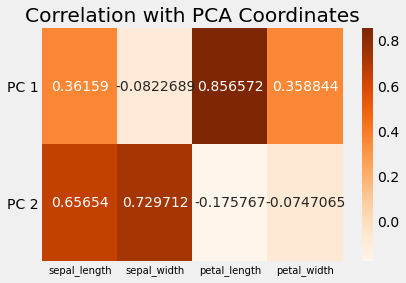

In [10]:
fig4=plt.figure()
axd=fig4.add_subplot(111)
sn.heatmap(pca.components_, annot=True, fmt='g',cmap='Oranges')
axd.set_yticks([0.5,1.5])
axd.set_yticklabels(['PC 1','PC 2'],rotation=0)
axd.set_xticks(np.arange(len(names[:-1]))+0.5)
axd.set_xticklabels(names[:-1],fontsize=10)
axd.set_title('Correlation with PCA Coordinates')
plt.show()